## Imports

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
import json

## Data Loading

In [2]:
data_path = 'data/movies'

metadata = pd.read_csv(os.path.join(data_path, 'movies_metadata.csv'), low_memory=False)

def convert_metadata(metadata):
    metadata['release_date'] = pd.to_datetime(metadata['release_date'], errors='coerce')
    metadata['budget'] = pd.to_numeric(metadata['budget'], errors='coerce')
    metadata['revenue'] = pd.to_numeric(metadata['revenue'], errors='coerce')
    metadata['runtime'] = pd.to_numeric(metadata['runtime'], errors='coerce')
    return metadata

metadata = convert_metadata(metadata)
metadata.info()
metadata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45466 non-null  object        
 1   belongs_to_collection  4494 non-null   object        
 2   budget                 45463 non-null  float64       
 3   genres                 45466 non-null  object        
 4   homepage               7782 non-null   object        
 5   id                     45466 non-null  object        
 6   imdb_id                45449 non-null  object        
 7   original_language      45455 non-null  object        
 8   original_title         45466 non-null  object        
 9   overview               44512 non-null  object        
 10  popularity             45461 non-null  object        
 11  poster_path            45080 non-null  object        
 12  production_companies   45463 non-null  object        
 13  p

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Data Cleaning

In [3]:
metadata = metadata[pd.notnull(metadata['title'])]
metadata = metadata[pd.notnull(metadata['budget'])]
metadata = metadata[pd.notnull(metadata['revenue'])]
metadata = metadata[pd.notnull(metadata['runtime'])]
metadata = metadata[pd.notnull(metadata['release_date'])]

metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45130 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45130 non-null  object        
 1   belongs_to_collection  4481 non-null   object        
 2   budget                 45130 non-null  float64       
 3   genres                 45130 non-null  object        
 4   homepage               7766 non-null   object        
 5   id                     45130 non-null  object        
 6   imdb_id                45118 non-null  object        
 7   original_language      45119 non-null  object        
 8   original_title         45130 non-null  object        
 9   overview               44435 non-null  object        
 10  popularity             45130 non-null  object        
 11  poster_path            44808 non-null  object        
 12  production_companies   45130 non-null  object        
 13  p

## Data Exploration

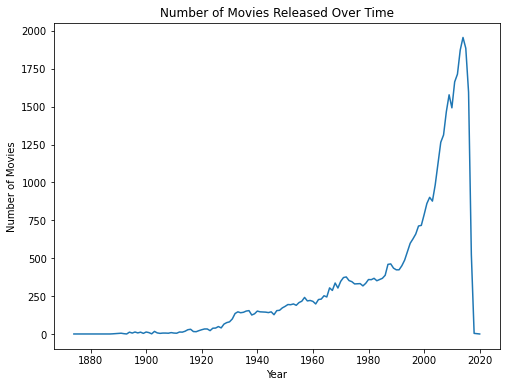

Earliest Year: 1874
Latest Year: 2020


In [4]:
metadata['year'] = pd.to_datetime(metadata['release_date'], errors='coerce').dt.year.astype('Int64')

plt.figure(figsize=(8, 6))
metadata.groupby('year').size().plot()
plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

start_year = int(metadata['year'].min())
end_year = int(metadata['year'].max())

print(f"Earliest Year: {start_year}")
print(f"Latest Year: {end_year}")

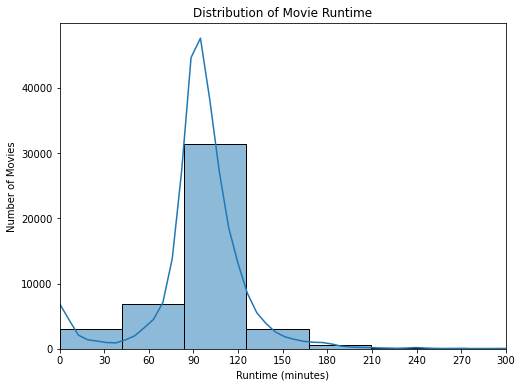

Minimum Runtime: 0.0 minutes
Maximum Runtime: 1256.0 minutes


In [5]:
min_runtime = metadata['runtime'].min()
max_runtime = metadata['runtime'].max()

plt.figure(figsize=(8, 6))
sns.histplot(metadata['runtime'], bins=30, kde=True)
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')

tick_interval = 30
ticks = range(int(min_runtime), int(max_runtime) + tick_interval, tick_interval)
plt.xticks(ticks)
plt.xlim(min_runtime, 300)

plt.show()

print(f"Minimum Runtime: {min_runtime} minutes")
print(f"Maximum Runtime: {max_runtime} minutes")

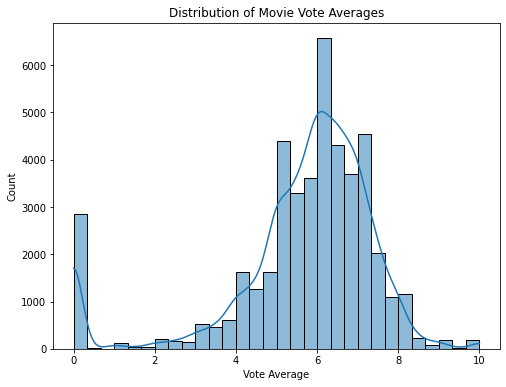

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(metadata['vote_average'], bins=30, kde=True)
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.title('Distribution of Movie Vote Averages')
plt.show()

In [7]:
min_budget = metadata['budget'].min()
max_budget = metadata['budget'].max()
min_revenue = metadata['revenue'].min()
max_revenue = metadata['revenue'].max()

print(f"Minimum Budget: ${min_budget:.2f}")
print(f"Maximum Budget: ${max_budget:.2f}")
print(f"Minimum Revenue: ${min_revenue:.2f}")
print(f"Maximum Revenue: ${max_revenue:.2f}")

Minimum Budget: $0.00
Maximum Budget: $380000000.00
Minimum Revenue: $0.00
Maximum Revenue: $2787965087.00


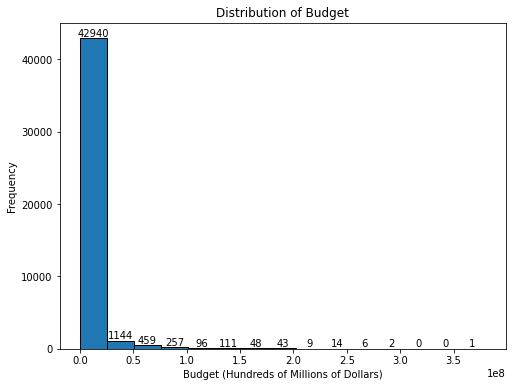

In [8]:
budget_data = metadata[metadata['budget'].notnull()]['budget']

plt.figure(figsize=(8, 6))
plt.hist(budget_data, bins=15, edgecolor='black')  
plt.xlabel('Budget (Hundreds of Millions of Dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Budget')

hist, bins = np.histogram(budget_data, bins=15)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

for count, (x, y) in zip(hist, zip(bin_centers, hist)):
    plt.text(x, y, str(count), ha='center', va='bottom')

plt.show()

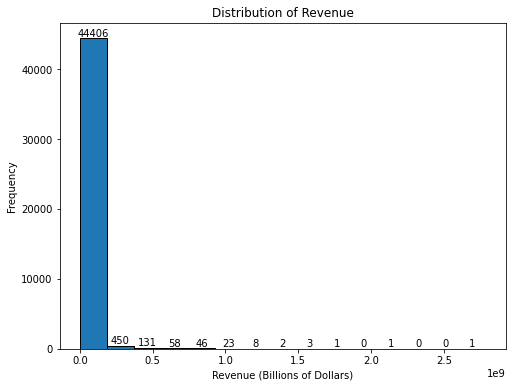

In [9]:
revenue_data = metadata[metadata['revenue'].notnull()]['revenue']

plt.figure(figsize=(8, 6))
plt.hist(revenue_data, bins=15, edgecolor='black')  
plt.xlabel('Revenue (Billions of Dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue')

hist, bins = np.histogram(revenue_data, bins=15)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

for count, (x, y) in zip(hist, zip(bin_centers, hist)):
    plt.text(x, y, str(count), ha='center', va='bottom')

plt.show()

Total Movies: 45130


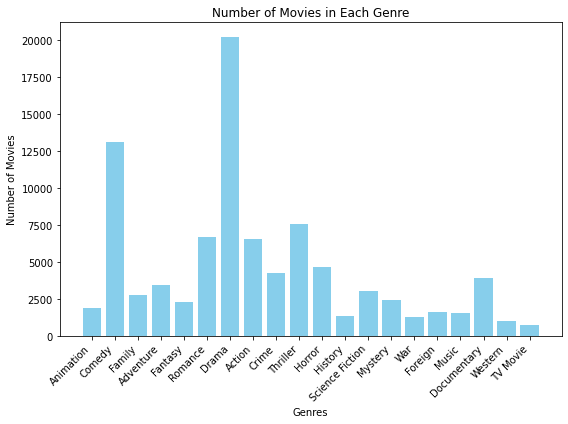

In [10]:
metadata['genre_list'] = metadata['genres'].apply(lambda x: [genre['name'] for genre in ast.literal_eval(x)])
genre_count = {}
movie_count = 0

for entry in metadata['genres']:
    entry_list = ast.literal_eval(entry) 
    movie_count += 1    
    for genre in entry_list:
        genre_name = genre['name']
        genre_count[genre_name] = genre_count.get(genre_name, 0) + 1

print(f"Total Movies: {movie_count}")

genres = list(genre_count.keys())
counts = list(genre_count.values())

plt.figure(figsize=(8, 6))
plt.bar(genres, counts, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

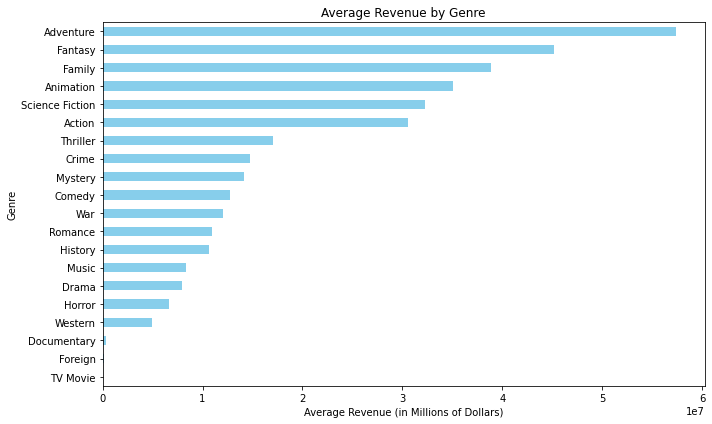

In [11]:
avg_revenue_by_genre = metadata.explode('genre_list').groupby('genre_list')['revenue'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_revenue_by_genre.plot(kind='barh', color='skyblue')
plt.xlabel('Average Revenue (in Millions of Dollars)')
plt.ylabel('Genre')
plt.title('Average Revenue by Genre')
plt.tight_layout()

plt.show()

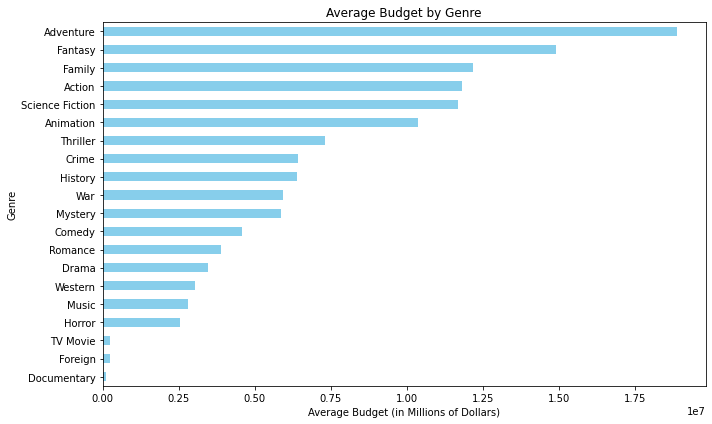

In [12]:
avg_budget_by_genre = metadata.explode('genre_list').groupby('genre_list')['budget'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_budget_by_genre.plot(kind='barh', color='skyblue')
plt.xlabel('Average Budget (in Millions of Dollars)')
plt.ylabel('Genre')
plt.title('Average Budget by Genre')
plt.tight_layout()

plt.show()

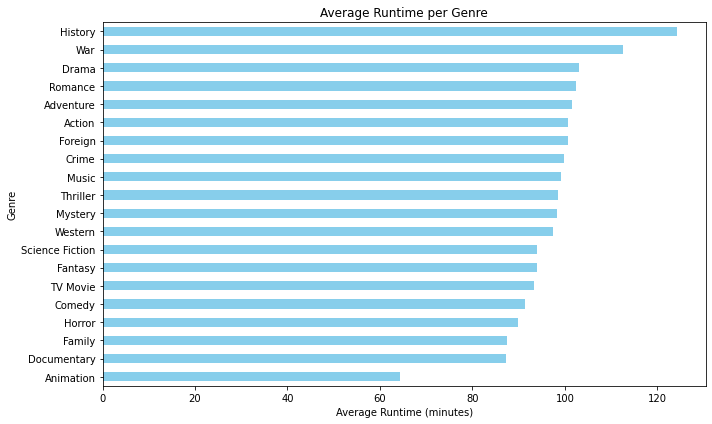

In [13]:
avg_runtime_by_genre = metadata.explode('genre_list').groupby('genre_list')['runtime'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_runtime_by_genre.plot(kind='barh', color='skyblue')
plt.xlabel('Average Runtime (minutes)')
plt.ylabel('Genre')
plt.title('Average Runtime per Genre')
plt.tight_layout()

plt.show()

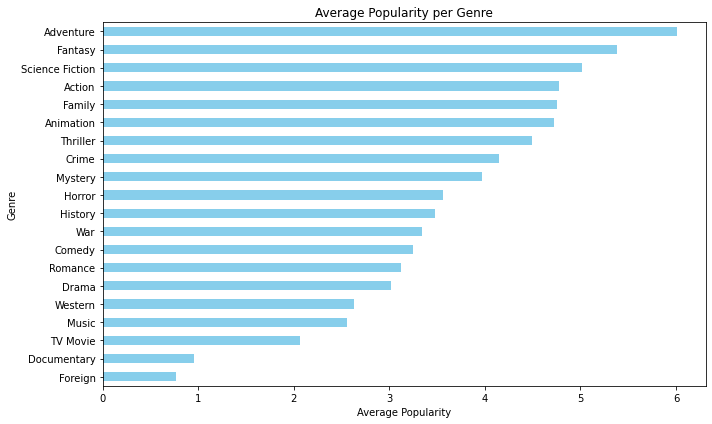

In [14]:
metadata['popularity'] = pd.to_numeric(metadata['popularity'], errors='coerce')
avg_popularity_by_genre = metadata.explode('genre_list').groupby('genre_list')['popularity'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_popularity_by_genre.plot(kind='barh', color='skyblue')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.title('Average Popularity per Genre')
plt.tight_layout()

plt.show()

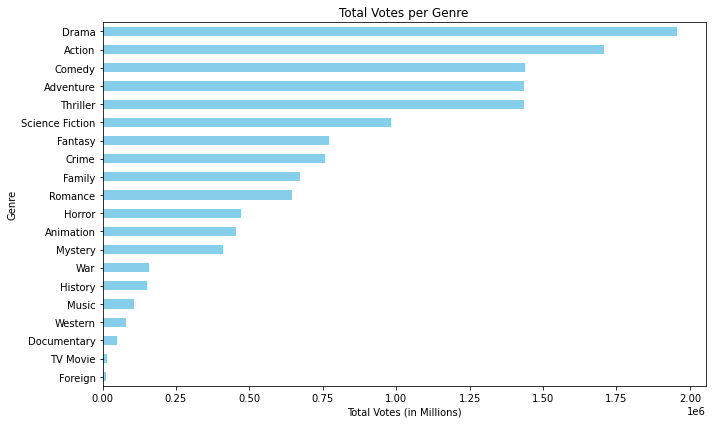

In [15]:
total_votes_by_genre = metadata.explode('genre_list').groupby('genre_list')['vote_count'].sum().sort_values()

plt.figure(figsize=(10, 6))
total_votes_by_genre.plot(kind='barh', color='skyblue')
plt.xlabel('Total Votes (in Millions)')
plt.ylabel('Genre')
plt.title('Total Votes per Genre')
plt.tight_layout()

plt.show()

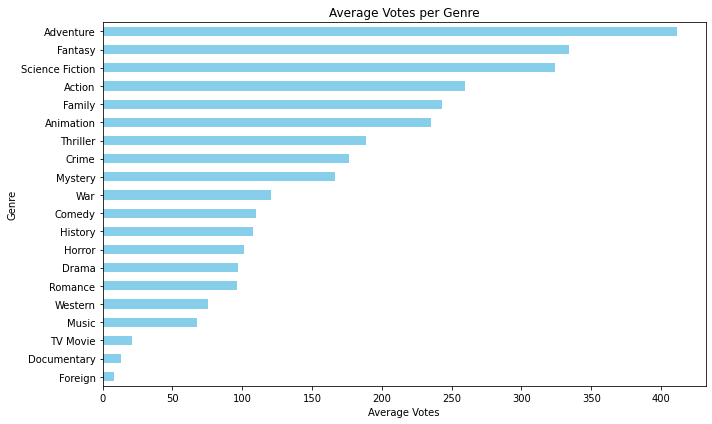

In [16]:
avg_votes_by_genre = metadata.explode('genre_list').groupby('genre_list')['vote_count'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_votes_by_genre.plot(kind='barh', color='skyblue')
plt.xlabel('Average Votes')
plt.ylabel('Genre')
plt.title('Average Votes per Genre')
plt.tight_layout()

plt.show()

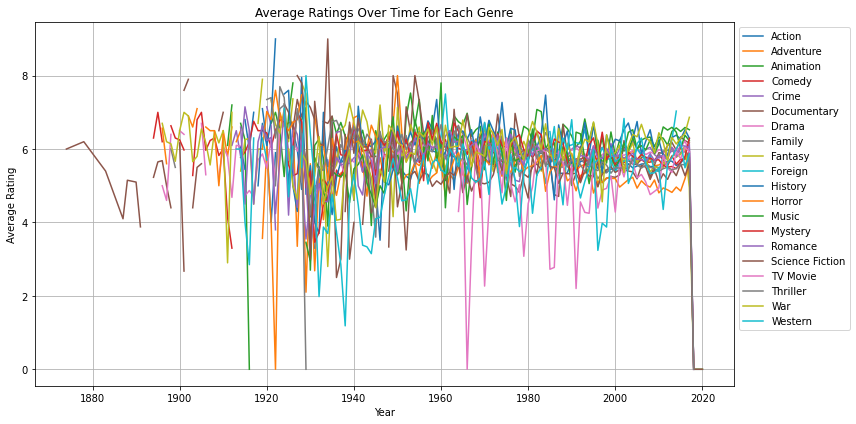

In [17]:
avg_ratings_by_genre = metadata.explode('genre_list').groupby(['year', 'genre_list'])['vote_average'].mean().unstack()

plt.figure(figsize=(12, 6))
for genre in avg_ratings_by_genre.columns:
    plt.plot(avg_ratings_by_genre.index, avg_ratings_by_genre[genre], label=genre)

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings Over Time for Each Genre')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

plt.show()

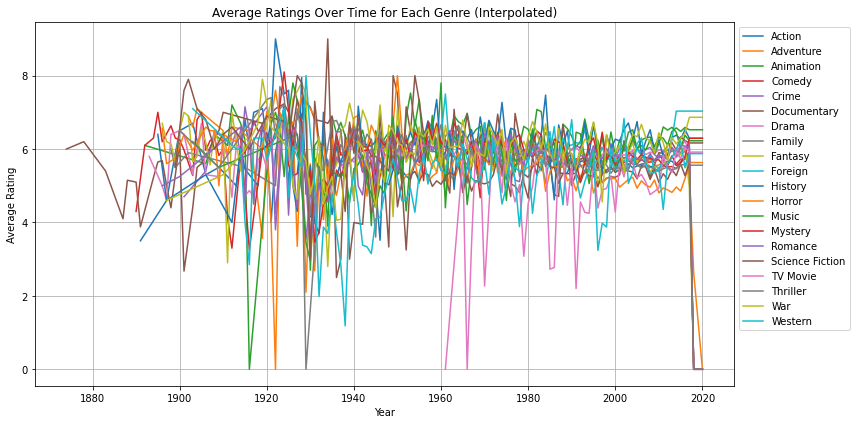

In [18]:
avg_ratings_by_genre = metadata.explode('genre_list').groupby(['year', 'genre_list'])['vote_average'].mean().unstack()
interpolated_data = avg_ratings_by_genre.interpolate(method='linear', axis=0)

plt.figure(figsize=(12, 6))
for genre in interpolated_data.columns:
    plt.plot(interpolated_data.index, interpolated_data[genre], label=genre)

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings Over Time for Each Genre (Interpolated)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

plt.show()